# Jupyter Superpower - Extend SQL analysis with Python
> Making collboration with Notebook possible and share perfect SQL analysis with Notebook.


- toc: false 
- badges: true
- comments: true
- author: noklam
- categories: ["python", "reviewnb", "sql"]
- hide: false

![Dbeaver](images/reviewnb/dbeaver.png "Screenshot of a typical IDE (DBeaver)")

In [2]:
#collapse-hide
# !pip install ipython_sql
%load_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False
# Download the file from https://github.com/cwoodruff/ChinookDatabase/blob/master/Scripts/Chinook_Sqlite.sqlite
%sql sqlite:///sales.sqlite.db
    
from pathlib import Path

DATA_DIR = Path('../_demo/sql_notebook')
list(DATA_DIR.iterdir())

[WindowsPath('../_demo/sql_notebook/README.md')]

In [3]:
%%sql
select ProductId, Sum(Unit) from Sales group by ProductId;

ProductId,Sum(Unit)
1,210
2,50
3,30


If you have everwritten SQL query to extract data from a database, you are probably familiar with a UI similar to this. The IDE offers features like auto-completion, visualize the query output, display the table schema and the ER diagram. Whenever you need to write query, this is your go-to tool. However, I found that adding `Jupyter Notebook` into the toolkits can improve my productivity and it complements crucial features that IDE cannot help.

## Notebook as a self-contained report

As a data scientist/data analyst, you writes SQL queries for ad-hoc analyses all the time. After getting the right data, you makes nice looking charts and put them in a PowerPoint and you are ready to present your findings. Unlike a well-define ETL job, you are exploring the data and testing your hypoethesis all the time. You make assumptions, which is often wrong but you only realized it after a few weeks. But all you got is a CSV that you cannot recalled how it was generated in the first place.

Data is not stationary, why should your analysis be? I have seen many screenshots, fragemented scripts flying around in organization. People re-do similar analysis because they cannot reproduce the result after a while, they don't expect the adhoc analysis would become a regular report. It would be really nice to keep your findings, charts, data and code in the same place, so you can extend it or update it afterward. 

## Notebook as an extension of IDE

When you code in a SQL IDE, you are limited to SQL only. Writing SQL query in notebook give you extra flexiblity, you can write python code to extends your query. 

* Complex logic that is not easy(impossible) to be done in SQL. 
* Make informative charts right after your query without exporting CSV.

For example, you can pipe your `SQL` query with `pandas` and then make a plot. It allows you to generate analysis with richer information query. If you find bugs in your code, you can simply modify the code and re-run the analysis. This allows you to extend your data without the need of exporting CSVs. This smoothen the process and make the analysis easier to be reproduced. In contrast, if you choose to export a CSV, it is almost certain that no one will be able to reproduce the data except the author. 

You can make use of the `ipython_sql` library to make query in a notebook. To do this, you need to use the **magic** function with the inline magic `%` or cell magic `%%`.

In [4]:
%%sql
SELECT * from sales LIMIT 3

ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


In [7]:
sales = %sql SELECT * from sales LIMIT 3
sales

ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


To make it fancier, you can even paramterized your query easily with variable. Tools like [papermill](https://www.bing.com/search?q=github+paramter+notebook&cvid=5b17218ec803438fb1ca41212d53d90a&FORM=ANAB01&PC=U531) allows you to parameterized your notebook. If you execute the notebook regularly with a scheduler, you can get a updated dashboard. To reference the python variable, the `$` sign is used.

In [8]:
table = "sales"
query = f"SELECT * from {table} LIMIT 3"
sales = %sql $query

In [9]:
sales

ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


With a little bit of python code, you can make some nice plot to show your insight or even make an interactive plot if you want. This is a very power way to extend your analysis.

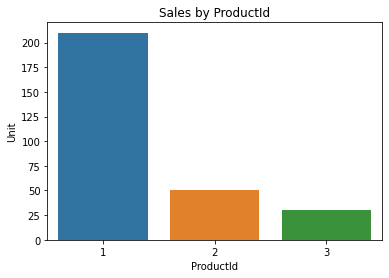

In [26]:
import seaborn as sns
sales = %sql SELECT * FROM SALES
sales_df = sales.DataFrame()
sales_df = sales_df.groupby('ProductId', as_index=False).sum()
ax = sns.barplot(x='ProductId', y='Unit', data=sales_df)
ax.set_title('Sales by ProductId');

## Notebook as a collaboration tool
Notebook is flexible and it fits extremely well with exploratory data analysis. To share to a non-coder, you can share the notebook or export it as an HTML file. They can read the report or any cached executed result. If they need to verify the data or add some extra plots, they can do it easily themselves. 
 
However, Notebooks have infamous reputations, it's not friendly to version control, it's hard to collaborate with notebook. Luckily, there are efforts that make collaboration in notebook a lot easier now.

Here what I did not show you is that the table has a `is_deleted` column. Some of the records are invalid and we should exclude them. In reality, this happens frequently when you are dealing with hundreds of tables with a lot of dependencies. Often, these tables are made for application, transaction, they do not really think about analytic. Therefore, the one who consume the data need to be a domain expert about these tables, understand the pitfall. This could be the data analyst, SME or the developer of that particular application. It takes many iterations to get the correct data that can be used to produce useful insight.

With ReviewNB, you can publish your result and invite some domain expert to review your analysis. This is where notebook shine, this kind of workflow is not possible with just the SQL script or a screenshot of your finding.

### Step 1 - Review PR on web

![Step1](images/reviewnb/step_1.png "Start a discussion on a cell block")

With ReviewNB, you can view your notebook and add comments on a particular cell, just like code review. This lower the technical barrier as your analyst do not have to understand Git. You can review changes and make discussion on web without the need to pull code at all. As soon as your analyst make suggestion, you can make changes accordingly.

### Step 2 - Review Changes

![Step2](images/reviewnb/step_2.png "Review changes side by side")

Once you have made changes for the notebook, you can review it side by side on ReviewNB. This is very trivial to do it locally without ReviewNB. As Git tracks changes in line level, you can't really read the changes as it consists of a lot of noise. It would also be impossible to view changes about the chart with git.

### Step 3 - Resolve Discussion

![Step3](images/reviewnb/step_3.png "Resolve the discussion.")

Once the changes are reviewed, you can resolve the discussion and share your insight with the team.

I hope this convince you that it is possible to collaborate with notebook with proper software in place. Regarless if you use notebook or not, you should consider to adopt similar workflow. Make your analysis reproducible today!